# Adult Income Prediction

## Introduction
This project aims to predict whether the annual income of an adult in "More or Less than 50K". It uses various factors like age, race, marital status and so on to make its prediction. The classification model used here is a ***Random Forest Classifier***

## Objective
Build a machine learning model which predicts if the income of an adult is greater than or less than 50K per year.

## Dataset

### Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

### Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository.
<a href="https://www.cs.toronto.edu/~delve/data/adult/desc.html" target="_blank">(Source)</a>

The detailed description on the dataset can be found in the original UCI documentation
<a href="https://www.cs.toronto.edu/~delve/data/adult/adultDetail.html" target="_blank">(Source)</a>

### Attribute Information:

- ***age***: continuous.
- ***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- ***fnlwgt***: continuous.
- ***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- ***education-num***: continuous.
- ***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- ***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- ***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- ***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- ***sex***: Female, Male.
- ***capital-gain***: continuous.
- ***capital-loss***: continuous.
- ***hours-per-week***: continuous.
- ***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- ***class***: >50K, <=50K
<br><br>

## Elementary Data Analysis

#### Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Reading Data from .csv file

In [2]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Analysing the Data

In [3]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [4]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

So, the most important variables have a lot of different categorical values. Hence, we can either do one-hot encoding on each column or we can create dummy variables and create a model on that. In this notebook, we have created dummy variables and worked on them.

## Data Pre-processing

So, in the next 3 cells, we have worked on the variable- ___Occupation___
<br>We, first got dummy variables of occupation. Then, we added all such variables and dropped the main ___occupation___ varibaled from the dataframe.

In [7]:
pd.get_dummies(df.occupation)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.get_dummies(df.occupation).add_prefix("Occupation_").map(lambda x: 1 if x else 0)

,Occupation_?,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df=pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df.occupation).add_prefix("Occupation_").map(lambda x: 1 if x else 0)],axis=1)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,...,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,0,0,1,0,0,0,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,0,0,1,0,0,0,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,Own-child,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,0,0,0,0,0,0,0,0,0,0


Now, we perform the same in all these other variables.

In [10]:
df=pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df['workclass']).add_prefix("workclass_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('marital-status',axis=1),pd.get_dummies(df['marital-status']).add_prefix("marital-status_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('relationship',axis=1),pd.get_dummies(df['relationship']).add_prefix("relationship_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('race',axis=1),pd.get_dummies(df['race']).add_prefix("race_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('native-country',axis=1),pd.get_dummies(df['native-country']).add_prefix("native-country_").map(lambda x: 1 if x else 0)],axis=1)



In [11]:
df

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,Male,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,Male,0,0,50,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,Male,7688,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,10,Female,0,0,30,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Female,0,0,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,HS-grad,9,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,HS-grad,9,Female,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,HS-grad,9,Male,0,0,20,<=50K,0,...,0,0,0,0,0,0,0,1,0,0


We, drop the ___education___ variable as there is already the ___educational-number___ variable which conveys the same.

In [12]:
df=df.drop('education',axis=1)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_?,Occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


For the ___gender___ and ___income___ variables, we one hot encode them as they are in string format. 

In [13]:
df['gender']=df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income']=df['income'].apply(lambda x:1 if x=='>50K' else 0)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_?,Occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


The ___fnlgwt___ variable is dropped as does not hold any significant meaning in this classification problem.

In [14]:
df=df.drop('fnlwgt',axis=1)

Now, we draw a heatmap to find out the correlations of each variable with the other.

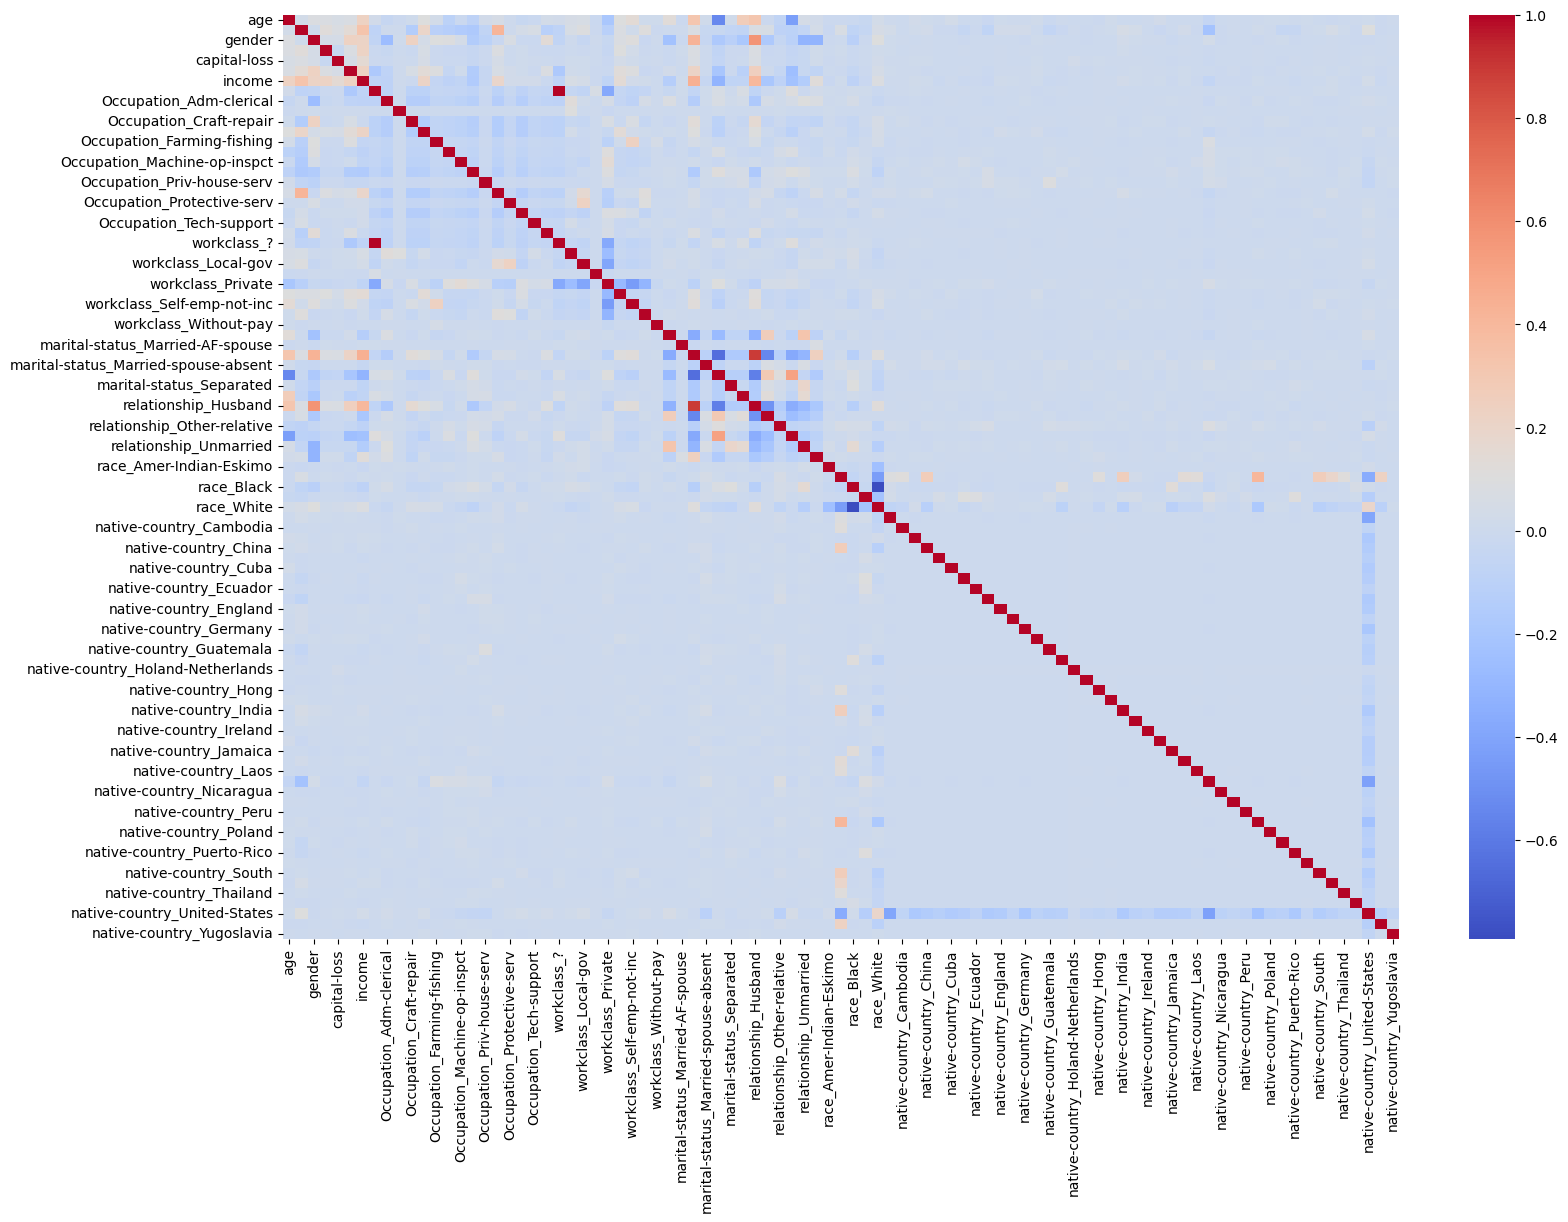

In [15]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=False ,cmap='coolwarm')
plt.show()

Since ___income___ is our target variable, we try to find out which variables correlate to our target variable the most.
<br>And also, choose the top 80% and draw a heatmap.

In [16]:
correlations = df.corr()['income'].abs()
correlations.sort_values()

native-country_Cuba                  0.000885
native-country_Hong                  0.001591
native-country_Holand-Netherlands    0.002538
native-country_Hungary               0.003538
native-country_Ireland               0.003744
                                       ...   
marital-status_Never-married         0.318782
educational-num                      0.332613
relationship_Husband                 0.403791
marital-status_Married-civ-spouse    0.445853
income                               1.000000
Name: income, Length: 91, dtype: float64

In [17]:
cols_to_drop = correlations.sort_values().iloc[:(int(0.8*(len(df.columns))))].index
df_dropped=df.drop(cols_to_drop,axis=1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_Exec-managerial,Occupation_Other-service,Occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


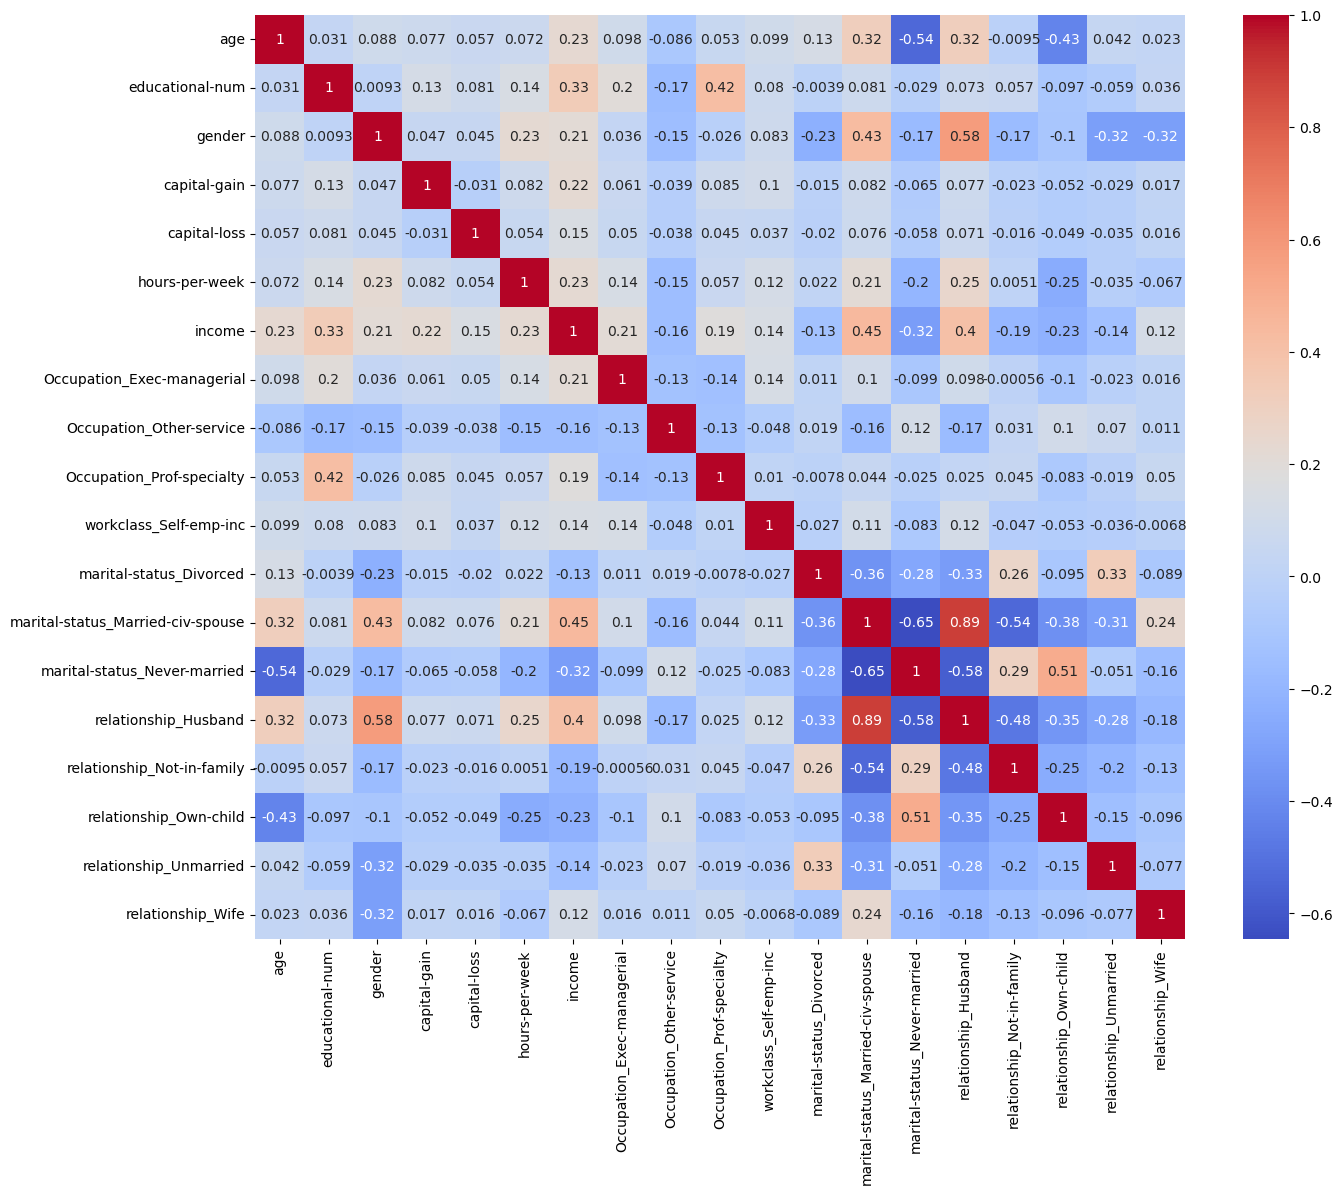

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df_dropped.corr(),annot=True ,cmap='coolwarm')
plt.show()

So, as we can see, ___age___, ___marital status___, ___education___ and ___hours per week___ are quite highly correlated to income.

## Modelling

So, now that we are done with pre-processing of the data, we divide our data into train and test datasets. The training dataset contains 80% of the total size and the subsequently the test dataset has 20%. We use train_test_split to do this.

In [19]:
train_df,test_df=train_test_split(df,test_size=0.2)

In [20]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_?,Occupation_Adm-clerical,Occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
36836,36,13,0,0,0,35,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22745,25,14,0,0,0,43,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10172,30,9,1,0,2002,43,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35681,61,10,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2375,47,13,0,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,24,11,0,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28384,54,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12502,43,10,1,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Occupation_?,Occupation_Adm-clerical,Occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38984,47,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28410,33,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31651,39,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5114,31,10,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44545,51,15,1,99999,0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37116,42,12,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1268,63,10,1,0,1887,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8207,22,13,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24968,58,13,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
X_train=train_df.drop('income',axis=1)
y_train=train_df['income']

X_test=test_df.drop('income',axis=1)
y_test=test_df['income']

In this notebook, we use a Random Forest Classifier as most of the data have a Yes/No value. So decision trees are supposed to work well on such data.

In [23]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
RFC.score(X_train,y_train)

0.9742533207073939

So, as we can see the Random Forest Classifier worked brilliantly providing 97% accuracy on the test dataset.

In the following 2 cells, we find out which features affected the most.

In [28]:
importances = dict(zip(RFC.feature_names_in_,RFC.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [29]:
importances

{'age': 0.22507673155511418,
 'educational-num': 0.13073270702182987,
 'hours-per-week': 0.11410818708139535,
 'capital-gain': 0.10849596813420201,
 'marital-status_Married-civ-spouse': 0.08732856915484127,
 'relationship_Husband': 0.04889385788470444,
 'capital-loss': 0.03580054948822469,
 'Occupation_Prof-specialty': 0.01878050434573609,
 'Occupation_Exec-managerial': 0.018563575592535575,
 'marital-status_Never-married': 0.01630521152999553,
 'relationship_Not-in-family': 0.01189314565026622,
 'gender': 0.011482799117091443,
 'relationship_Wife': 0.009920938247720315,
 'workclass_Private': 0.009435688787615581,
 'relationship_Own-child': 0.008480592207186836,
 'workclass_Self-emp-not-inc': 0.008116486475167984,
 'Occupation_Other-service': 0.008089053538498368,
 'marital-status_Divorced': 0.006389988796318301,
 'Occupation_Craft-repair': 0.006267838253120546,
 'Occupation_Sales': 0.0062263651985807,
 'workclass_Self-emp-inc': 0.006127999398558091,
 'native-country_United-States': 0.

Here, we get a similar idea to the one we got from the heatmap. 'age', 'educational-num', 'hours-per-week', 'capital-gain', 'marital-status' are the most important features out of all.

***

### Authors
<a href="https://www.linkedin.com/in/kinjal-mitra-992147325/" target="_blank">Kinjal Mitra</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | 
| ----------------- | ------- | ---------- | 
| 2024-12-21        | 1.0     | Kinjal Mitra |